# Classification models for those with more than 3 classes

[dataset: Letter Recognition](https://archive.ics.uci.edu/dataset/59/letter+recognition)

In [5]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 
  
# variable information 
print(letter_recognition.variables) 

letter = pd.concat([X, y], axis=1)
letter.head()


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G


In [11]:
#read dimensions and dtypes
print("Number of datapoints (rows):", letter.shape[0])
print("Number of columns:", letter.shape[1])
print("\nData types:\n", letter.dtypes)

Number of datapoints (rows): 20000
Number of columns: 17

Data types:
 x-box     int64
y-box     int64
width     int64
high      int64
onpix     int64
x-bar     int64
y-bar     int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybr     int64
xy2br     int64
x-ege     int64
xegvy     int64
y-ege     int64
yegvx     int64
lettr    object
dtype: object


In [12]:
# One-hot encoding via pandas
y_onehot = pd.get_dummies(y)

print(y_onehot.head())
print("Shape:", y_onehot.shape)  # (20000, 26)

y_onehot.head()

   lettr_A  lettr_B  lettr_C  lettr_D  lettr_E  lettr_F  lettr_G  lettr_H  \
0    False    False    False    False    False    False    False    False   
1    False    False    False    False    False    False    False    False   
2    False    False    False     True    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False     True    False   

   lettr_I  lettr_J  ...  lettr_Q  lettr_R  lettr_S  lettr_T  lettr_U  \
0    False    False  ...    False    False    False     True    False   
1     True    False  ...    False    False    False    False    False   
2    False    False  ...    False    False    False    False    False   
3    False    False  ...    False    False    False    False    False   
4    False    False  ...    False    False    False    False    False   

   lettr_V  lettr_W  lettr_X  lettr_Y  lettr_Z  
0    False    False    False    False    False  


,lettr_A,lettr_B,lettr_C,lettr_D,lettr_E,lettr_F,lettr_G,lettr_H,lettr_I,lettr_J,...,lettr_Q,lettr_R,lettr_S,lettr_T,lettr_U,lettr_V,lettr_W,lettr_X,lettr_Y,lettr_Z
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
letter_final = pd.concat([X, y_onehot], axis=1)
letter_final.head()


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,lettr_Q,lettr_R,lettr_S,lettr_T,lettr_U,lettr_V,lettr_W,lettr_X,lettr_Y,lettr_Z
0,2,8,3,5,1,8,13,0,6,6,...,False,False,False,True,False,False,False,False,False,False
1,5,12,3,7,2,10,5,5,4,13,...,False,False,False,False,False,False,False,False,False,False
2,4,11,6,8,6,10,6,2,6,10,...,False,False,False,False,False,False,False,False,False,False
3,7,11,6,6,3,5,9,4,6,4,...,False,False,False,False,False,False,False,False,False,False
4,2,1,3,1,1,8,6,6,6,6,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# one-hot encoder via scikit-learn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # use sparse=False in older sklearn versions
y_onehot = encoder.fit_transform(y.values.reshape(-1, 1))

print(y_onehot[:5])        # first 5 encoded rows
print("Shape:", y_onehot.shape)  # (20000, 26)
print("Categories:", encoder.categories_)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
Shape: (20000, 26)
Categories: [array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)]


In [15]:
import pandas as pd

# Get column names (A–Z)
letters = encoder.categories_[0]

# Convert NumPy array -> DataFrame
y_onehot_df = pd.DataFrame(y_onehot, columns=letters, index=y.index)

# Concatenate with features
df_final = pd.concat([X, y_onehot_df], axis=1)
df_final.head()


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,Q,R,S,T,U,V,W,X,Y,Z
0,2,8,3,5,1,8,13,0,6,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,12,3,7,2,10,5,5,4,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,11,6,8,6,10,6,2,6,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,11,6,6,3,5,9,4,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1,3,1,1,8,6,6,6,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#correlation: which features are most correlated with each letter class (A–Z)?
from scipy.stats import pointbiserialr
import pandas as pd

results = {}

# Use y_onehot_df instead of y_onehot
for target in y_onehot_df.columns:  # each letter (A–Z)
    results[target] = []
    for feature in X.columns:
        r, p = pointbiserialr(X[feature], y_onehot_df[target])
        results[target].append(r)

# Put into DataFrame
corr_df = pd.DataFrame(results, index=X.columns)
corr_df.head()

# Preview top correlations for first 5 letters
for target in y_onehot_df.columns[:26]:
    print(f"\nTop correlations for {target}:")
    print(corr_df[target].sort_values(ascending=False).head(3))



Top correlations for A:
x-bar    0.195468
xy2br    0.052223
width    0.000620
Name: A, dtype: float64

Top correlations for B:
y-ege    0.227045
yegvx    0.160314
onpix    0.099376
Name: B, dtype: float64

Top correlations for C:
xy2br    0.377481
y2bar    0.164148
x2bar    0.094071
Name: C, dtype: float64

Top correlations for D:
y2bar    0.114354
x2bar    0.098085
x-bar    0.064846
Name: D, dtype: float64

Top correlations for E:
xy2br    0.231681
y2bar    0.202060
y-ege    0.181413
Name: E, dtype: float64

Top correlations for F:
y-bar    0.255042
xybar    0.238872
x2ybr    0.105080
Name: F, dtype: float64

Top correlations for G:
yegvx    0.175395
xy2br    0.159692
y-ege    0.113606
Name: G, dtype: float64

Top correlations for H:
x2bar    0.149967
x-ege    0.068310
onpix    0.066615
Name: H, dtype: float64

Top correlations for I:
xybar    0.095099
y2bar    0.066129
x-bar    0.054814
Name: I, dtype: float64

Top correlations for J:
xybar    0.307653
x-bar    0.269090
xy2br    0.0

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (16000, 16) (16000, 1)
Test shape: (4000, 16) (4000, 1)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Train Random Forest ----
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)   # for ROC curve

# ---- Accuracy & Classification Report ----
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


C:\Users\Leon Pascual\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.96925

Classification Report:

              precision    recall  f1-score   support

           A       1.00      0.99      1.00       158
           B       0.91      0.97      0.94       153
           C       0.97      0.97      0.97       147
           D       0.92      0.97      0.94       161
           E       0.96      0.97      0.96       154
           F       0.93      0.95      0.94       155
           G       0.97      0.95      0.96       155
           H       0.94      0.89      0.92       147
           I       0.98      0.94      0.96       151
           J       0.97      0.97      0.97       149
           K       0.95      0.97      0.96       148
           L       1.00      0.98      0.99       152
           M       0.99      0.99      0.99       158
           N       0.97      0.96      0.96       157
           O       0.97      0.97      0.97       150
           P       0.98      0.96      0.97       161
           Q       0.95      0.98     

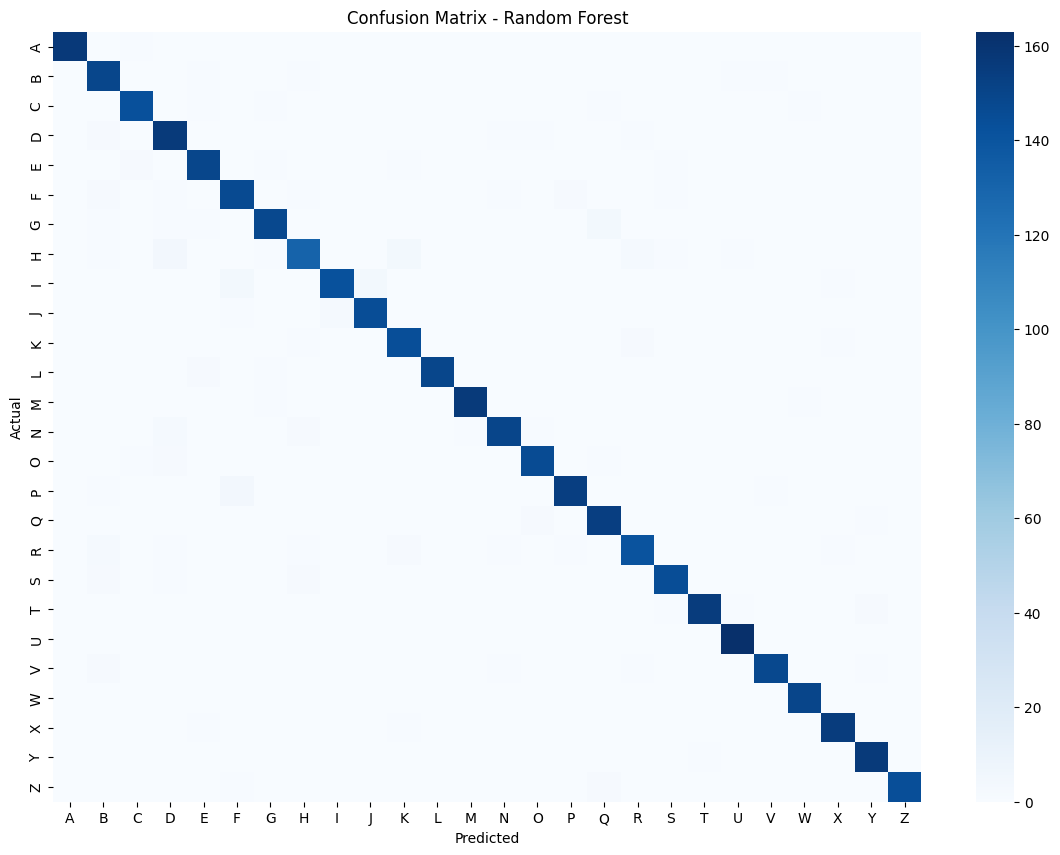

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=rf.classes_,
            yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


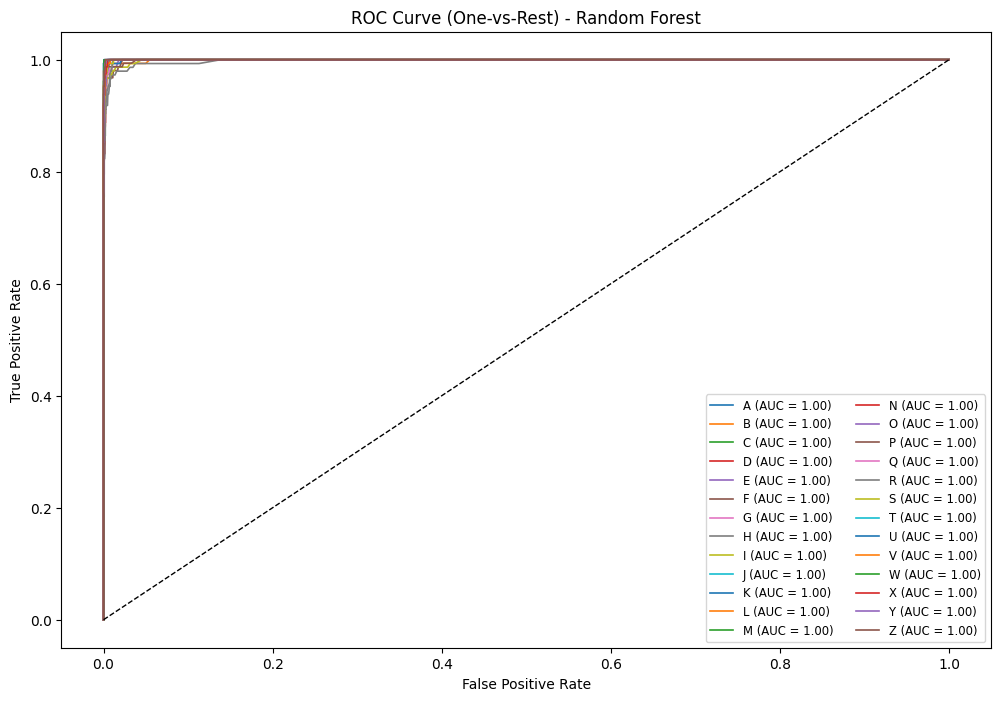

In [36]:
# One-hot encode test labels for ROC
y_test_bin = label_binarize(y_test, classes=rf.classes_)

plt.figure(figsize=(12,8))
for i, class_label in enumerate(rf.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1.2, label=f"{class_label} (AUC = {roc_auc:.2f})")

# Random baseline
plt.plot([0,1], [0,1], "k--", lw=1.0)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest) - Random Forest")
plt.legend(loc="best", fontsize="small", ncol=2)
plt.show()


In [25]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize CatBoost
model = CatBoostClassifier(
    iterations=500,        # number of boosting rounds
    depth=6,               # tree depth
    learning_rate=0.1,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    early_stopping_rounds=100,
    verbose=100            # show progress every 100 iterations
)

# Fit the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)


0:	learn: 0.3743125	test: 0.3680000	best: 0.3680000 (0)	total: 136ms	remaining: 1m 7s
100:	learn: 0.9315625	test: 0.9120000	best: 0.9120000 (100)	total: 17.4s	remaining: 1m 8s
200:	learn: 0.9665625	test: 0.9450000	best: 0.9460000 (196)	total: 39.4s	remaining: 58.6s
300:	learn: 0.9811875	test: 0.9555000	best: 0.9555000 (300)	total: 58.9s	remaining: 39s
400:	learn: 0.9893750	test: 0.9615000	best: 0.9615000 (398)	total: 1m 19s	remaining: 19.8s
499:	learn: 0.9940000	test: 0.9640000	best: 0.9645000 (491)	total: 1m 45s	remaining: 0us

bestTest = 0.9645
bestIteration = 491

Shrink model to first 492 iterations.


In [26]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9645
              precision    recall  f1-score   support

           A       0.98      0.99      0.98       158
           B       0.89      0.97      0.93       153
           C       0.97      0.97      0.97       147
           D       0.90      0.95      0.92       161
           E       0.94      0.98      0.96       154
           F       0.96      0.94      0.95       155
           G       0.96      0.97      0.97       155
           H       0.94      0.90      0.92       147
           I       0.98      0.90      0.94       151
           J       0.94      0.97      0.95       149
           K       0.98      0.94      0.96       148
           L       0.99      0.97      0.98       152
           M       0.99      0.98      0.99       158
           N       0.96      0.93      0.94       157
           O       0.97      0.95      0.96       150
           P       0.98      0.97      0.97       161
           Q       0.96      0.98      0.97       157
          

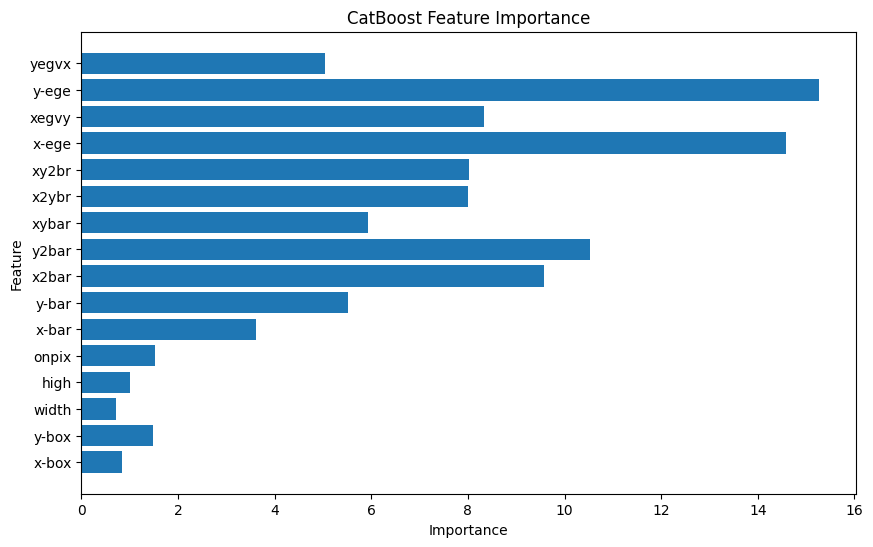

In [27]:
import matplotlib.pyplot as plt

importances = model.get_feature_importance()
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("CatBoost Feature Importance")
plt.show()


In [29]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


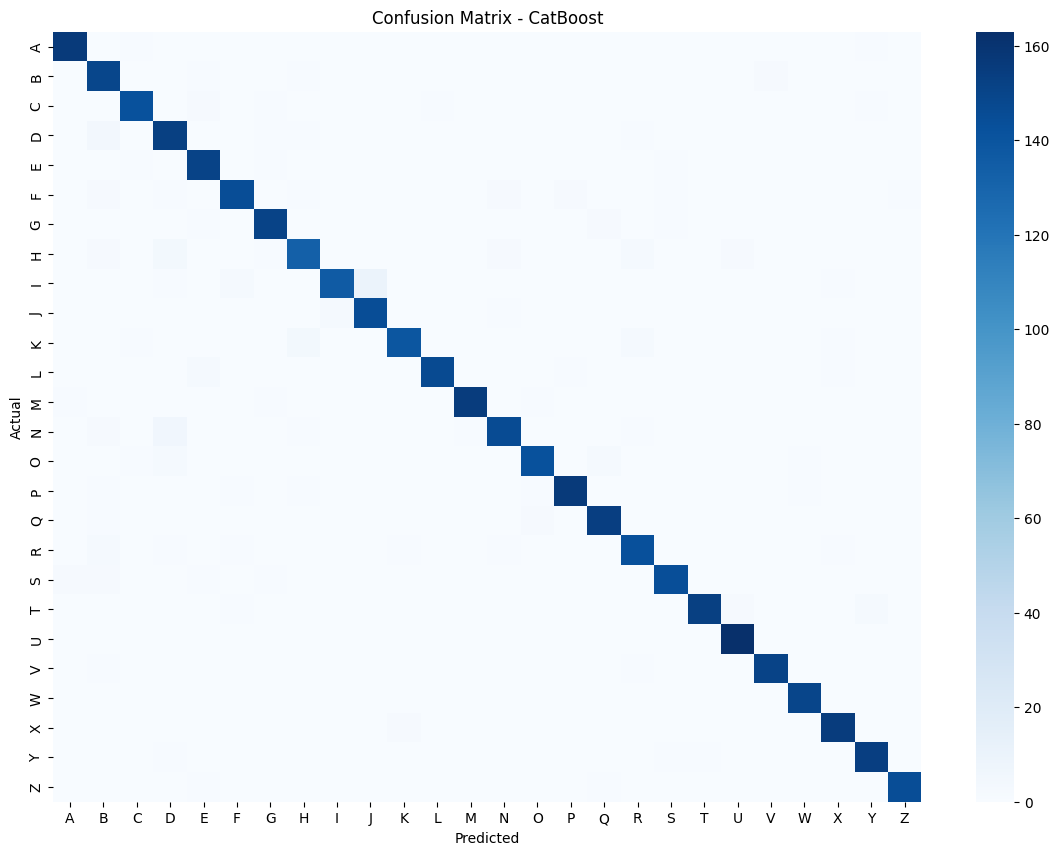

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()


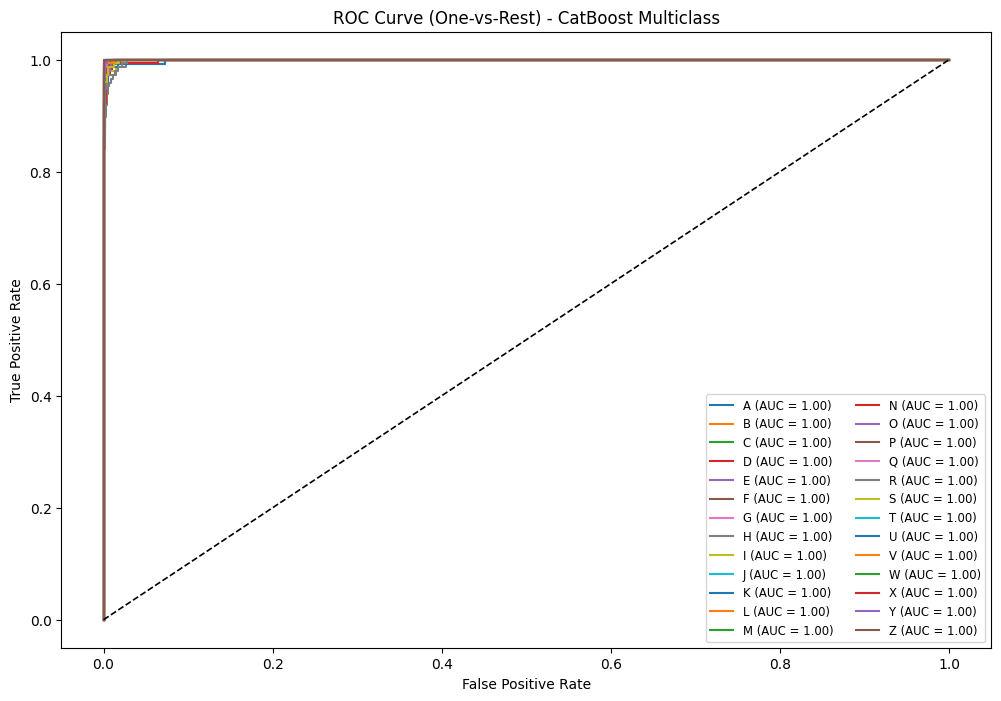

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get prediction probabilities
y_proba = model.predict_proba(X_test)

# Binarize true labels (one-hot for ROC)
y_test_bin = label_binarize(y_test, classes=model.classes_)

# ROC curve per class
plt.figure(figsize=(12,8))
for i, class_label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1.5, label=f"{class_label} (AUC = {roc_auc:.2f})")

# Random baseline
plt.plot([0,1], [0,1], "k--", lw=1.2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest) - CatBoost Multiclass")
plt.legend(loc="best", fontsize="small", ncol=2)
plt.show()
